In [6]:
#CELL-NO: 1
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(xgb.__version__)
print ("All imports succesful")

3.1.0
All imports succesful


In [ ]:
#CELL-NO: 2
# Generate classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42
)

# Train the model
xgb_classifier.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=False
)

print("model training with xgboost successful")

model training with xgboost successful


In [3]:
#CELL-NO: 3
# Make predictions
y_pred = xgb_classifier.predict(X_test)
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Evaluate performance
print("XGBoost Classification Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


XGBoost Classification Results:
Accuracy: 0.9200
AUC-ROC: 0.9808

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       106
           1       0.90      0.94      0.92        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



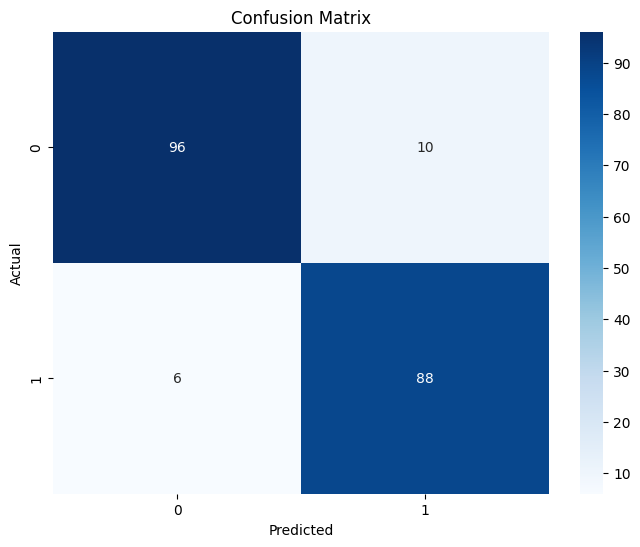

In [7]:
#CELL-NO: 4
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

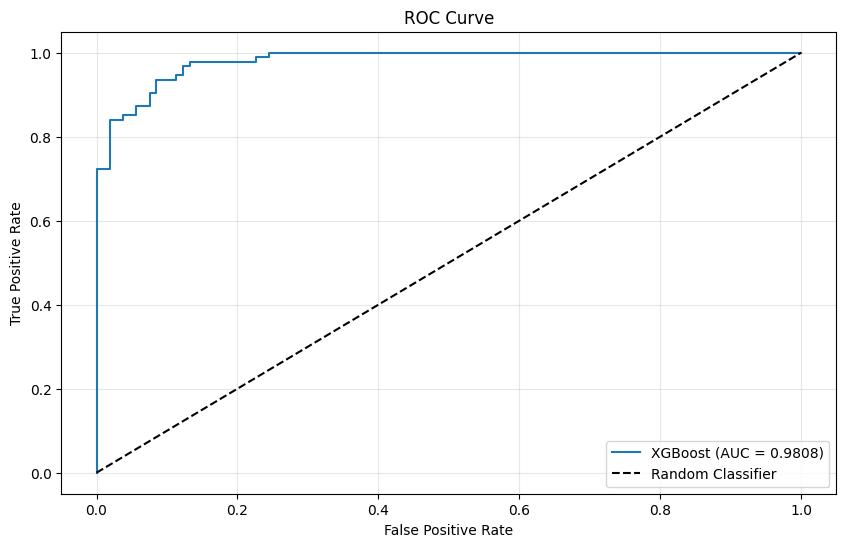

In [8]:
#CELL-NO: 5
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


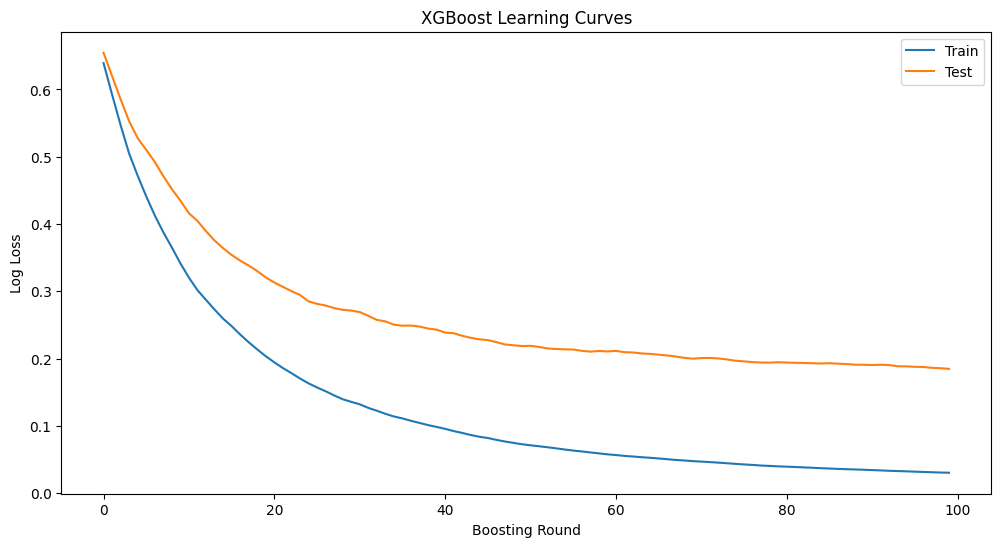

In [9]:
#CELL-NO: 6
# Retrieve evaluation results
results = xgb_classifier.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Plot learning curves
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
ax.set_ylabel('Log Loss')
ax.set_xlabel('Boosting Round')
ax.set_title('XGBoost Learning Curves')
plt.show()

<Figure size 1000x800 with 0 Axes>

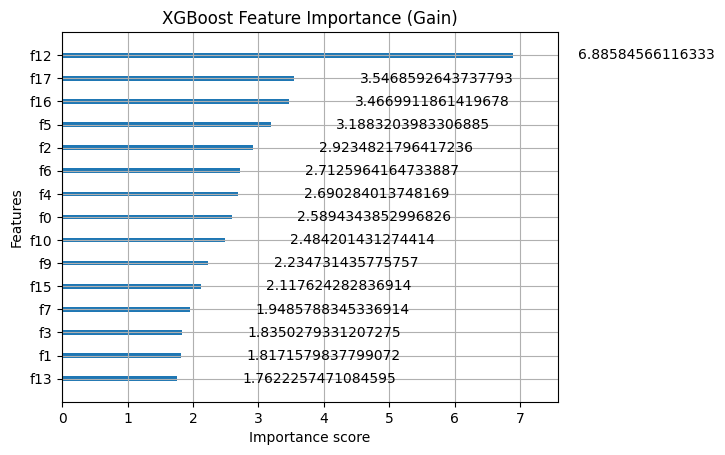

In [10]:
#CELL-NO: 7
# Feature importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_classifier, max_num_features=15, importance_type='gain')
plt.title('XGBoost Feature Importance (Gain)')
plt.show()

In [11]:
#CELL-NO: 8
# Hyperparameter tuning example with cross-validation
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

print("\nPerforming grid search for optimal parameters...")
xgb_cv = xgb.XGBClassifier(random_state=42)
grid_search = GridSearchCV(
    xgb_cv, 
    param_grid, 
    cv=3, 
    scoring='roc_auc',
    verbose=0
)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV AUC-ROC: {grid_search.best_score_:.4f}")


Performing grid search for optimal parameters...
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best CV AUC-ROC: 0.9594
